# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM progen lineage

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8763
CD56 bright NK         449
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1464
tDC                    193
tip EC                 362
Length: 64, dtype: int64

In [6]:
progen_celltypes = ['HSC', 'MPP myeloid', 'CMP', 'GMP', 'MEMP', 'MEP', 'eo/baso/mast precursor', 
                    'LMPP', 'ELP']

In [7]:
adata = adata[adata.obs['cell.labels'].isin(progen_celltypes)].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                        425
ELP                       1357
GMP                       1281
HSC                         92
LMPP                        34
MEMP                        16
MEP                        269
MPP myeloid                 92
eo/baso/mast precursor     175
dtype: int64

In [9]:
adata.shape

(3741, 33712)

# Pre-process the dataset

In [10]:
# normalise count data 
sc.pp.normalize_total(adata)

In [11]:
# log the count data 
sc.pp.log1p(adata)

In [12]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [13]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [14]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [15]:
# run pca
sc.tl.pca(adata, n_comps=50)

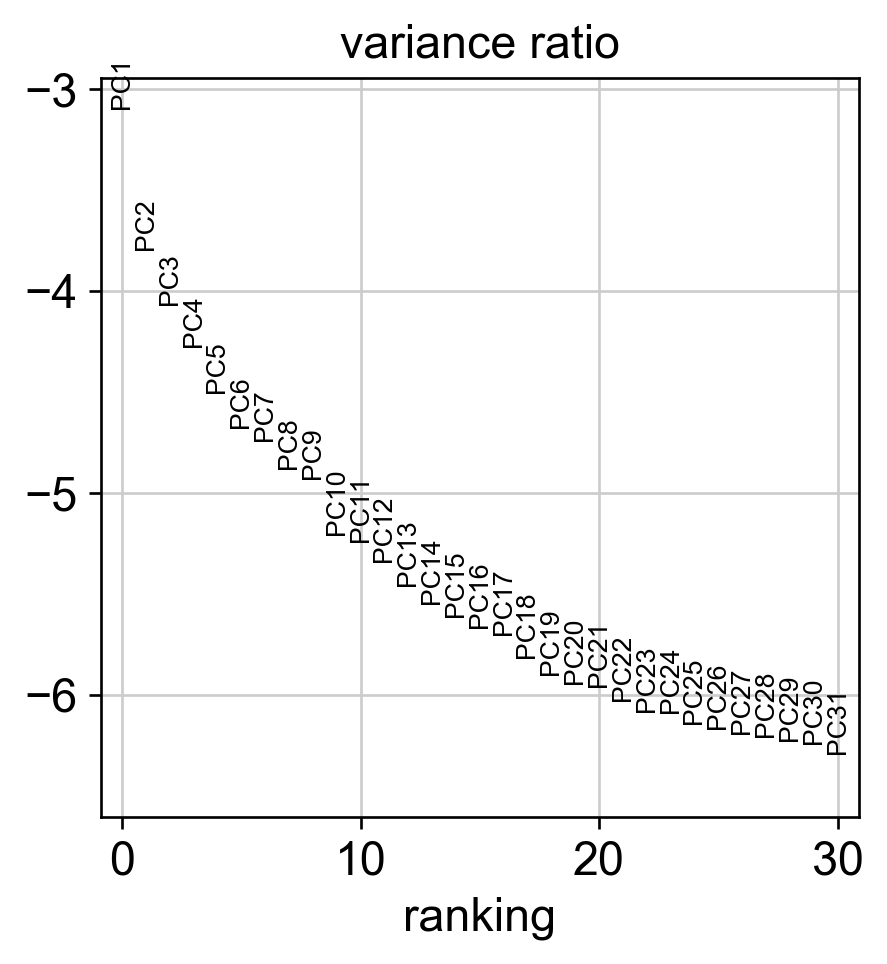

In [16]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [17]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [18]:
# run umap
sc.tl.umap(adata) 

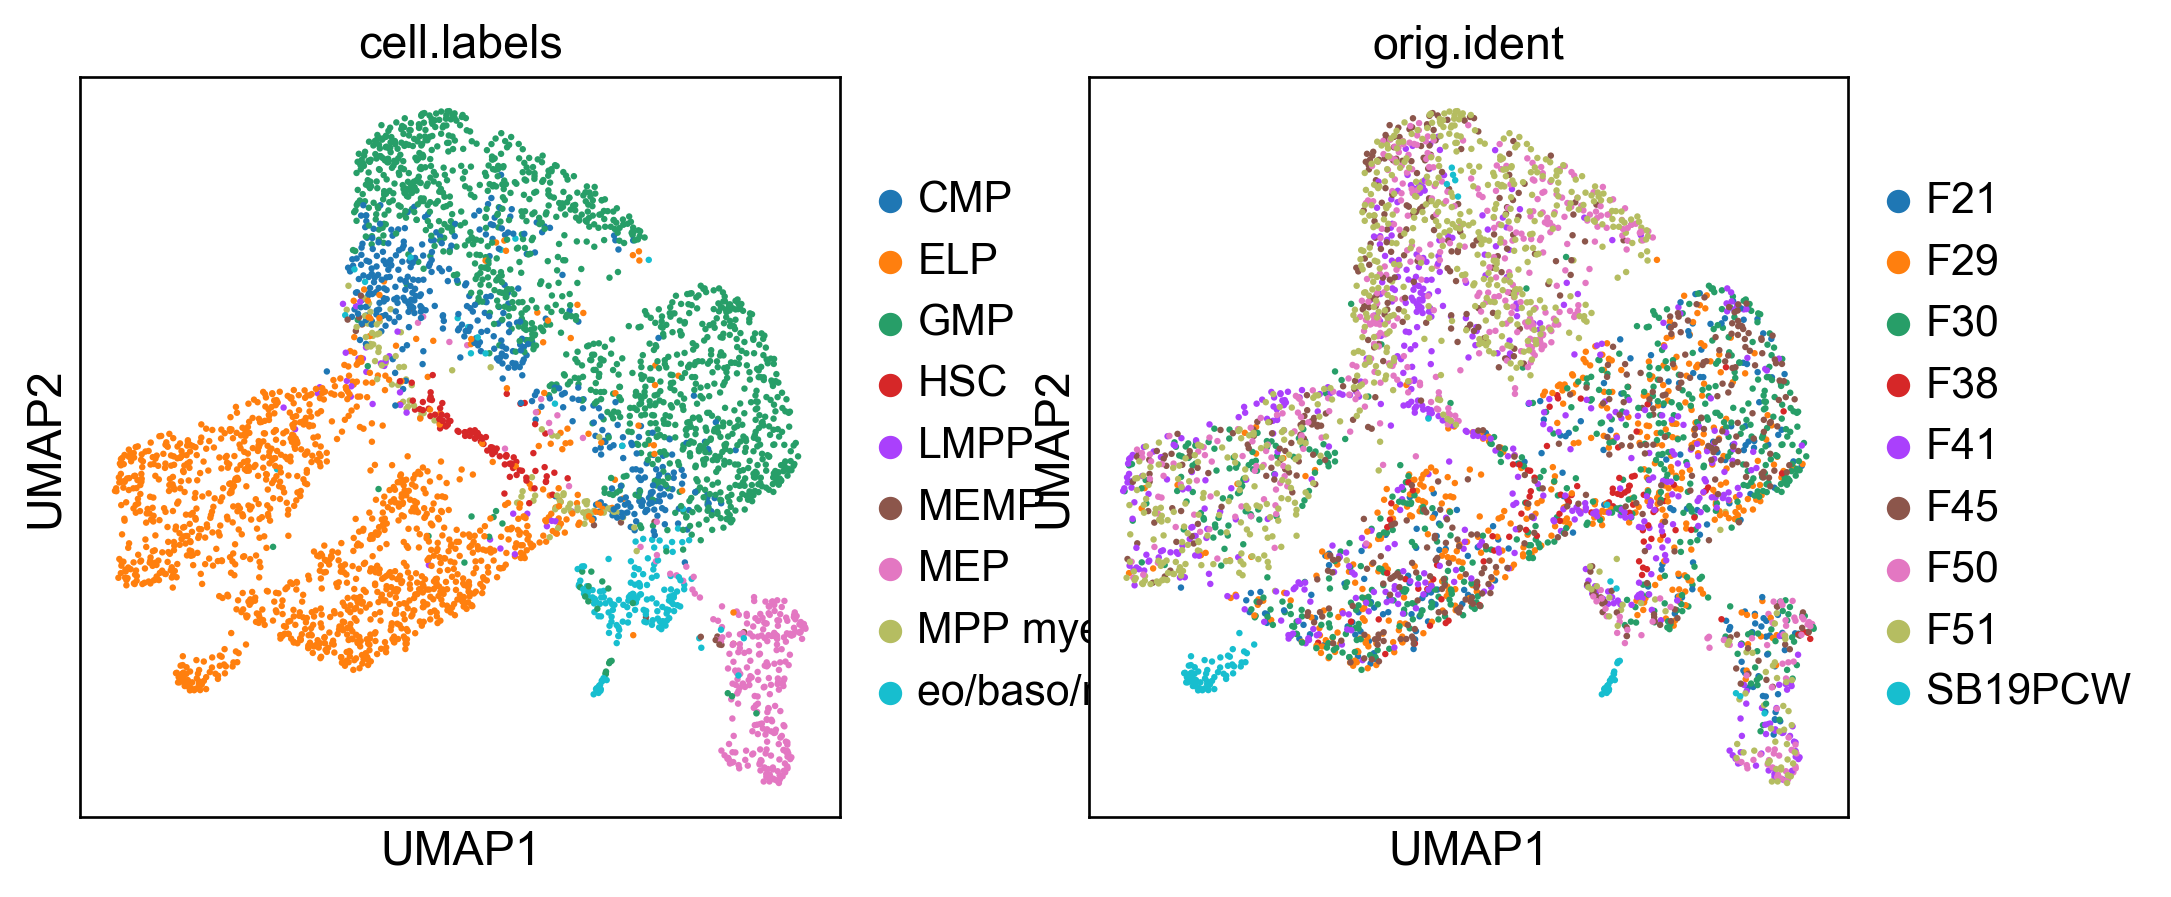

In [19]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

# Run harmony batch correction

In [20]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [21]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [22]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [23]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add dimensional reduction post-harmony

In [24]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [25]:
# run umap
sc.tl.umap(adata) 

In [26]:
# run fdg 
# As an input, FDG requires PCA coordinates and a snn graph. must redo snn graph if re-running fdg on subsets 
sc.tl.draw_graph(adata, init_pos='X_pca', layout='fa')

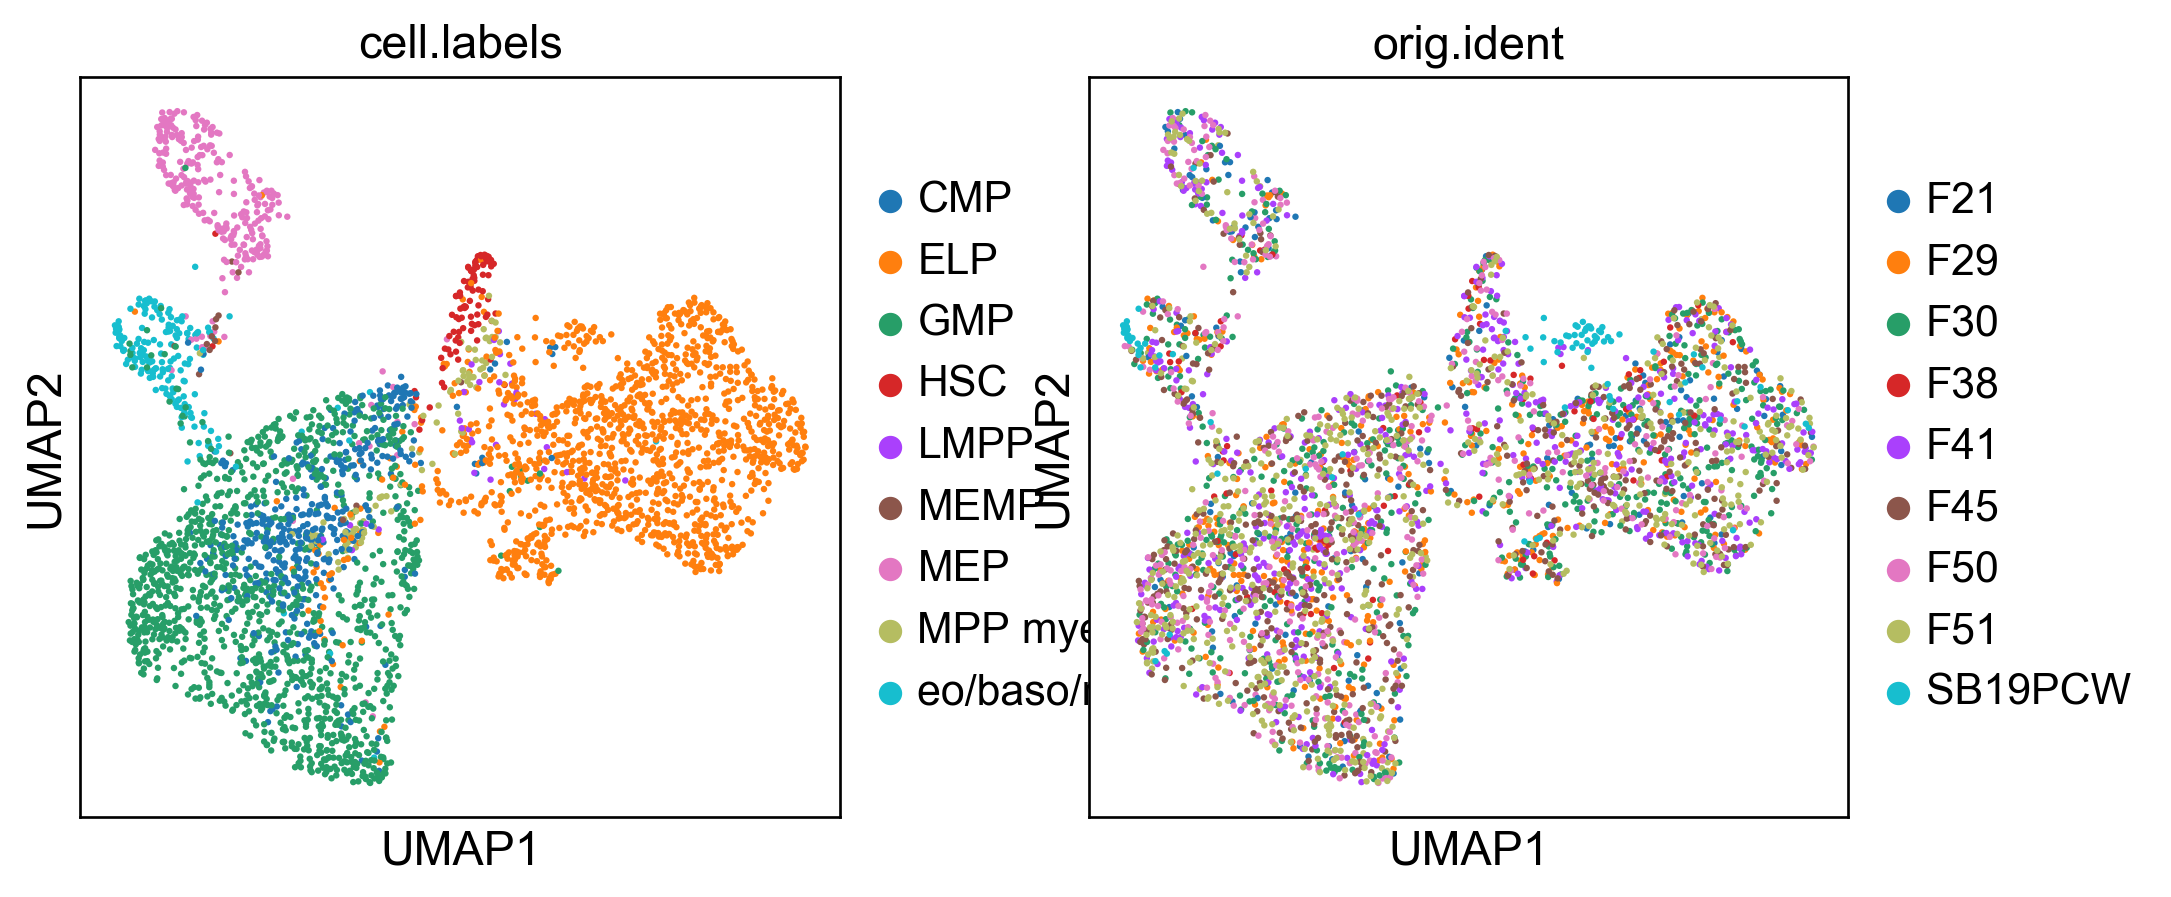

In [27]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident',], size=15) 

# Change the colours for the gran and neut lineage

In [28]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['CMP', 'ELP', 'GMP', 'HSC', 'LMPP', 'MEMP', 'MEP', 'MPP myeloid',
       'eo/baso/mast precursor'],
      dtype='object')

In [29]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].cat.reorder_categories([
    'HSC', 'MPP myeloid', 'CMP', 'GMP', 'MEMP', 'MEP', 'eo/baso/mast precursor', 
                    'LMPP', 'ELP'])

In [30]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['HSC', 'MPP myeloid', 'CMP', 'GMP', 'MEMP', 'MEP',
       'eo/baso/mast precursor', 'LMPP', 'ELP'],
      dtype='object')

In [31]:
adata.obs["cell.labels"].cat.categories[2]

'CMP'

In [32]:
new_colors = np.array(adata.uns["cell.labels_colors"])

new_colors[[0]] = '#3B50A2' # HSC
new_colors[[1]] = '#64C5E4' # MPP myeloid 
new_colors[[2]] = '#F9F06C' # CMP
new_colors[[3]] = '#F59771' # GMP
new_colors[[4]] = '#A9479A' # MEMP
new_colors[[5]] = '#AD83BB' # MEP
new_colors[[6]] = '#D43D6A' # eo/baso/mast precursor
new_colors[[7]] = '#1B6633' # LMPP 
new_colors[[8]] = '#D1DB94' # ELP


adata.uns["cell.labels_colors"] = new_colors

new_colors

array(['#3B50A2', '#64C5E4', '#F9F06C', '#F59771', '#A9479A', '#AD83BB',
       '#D43D6A', '#1B6633', '#D1DB94'], dtype='<U7')

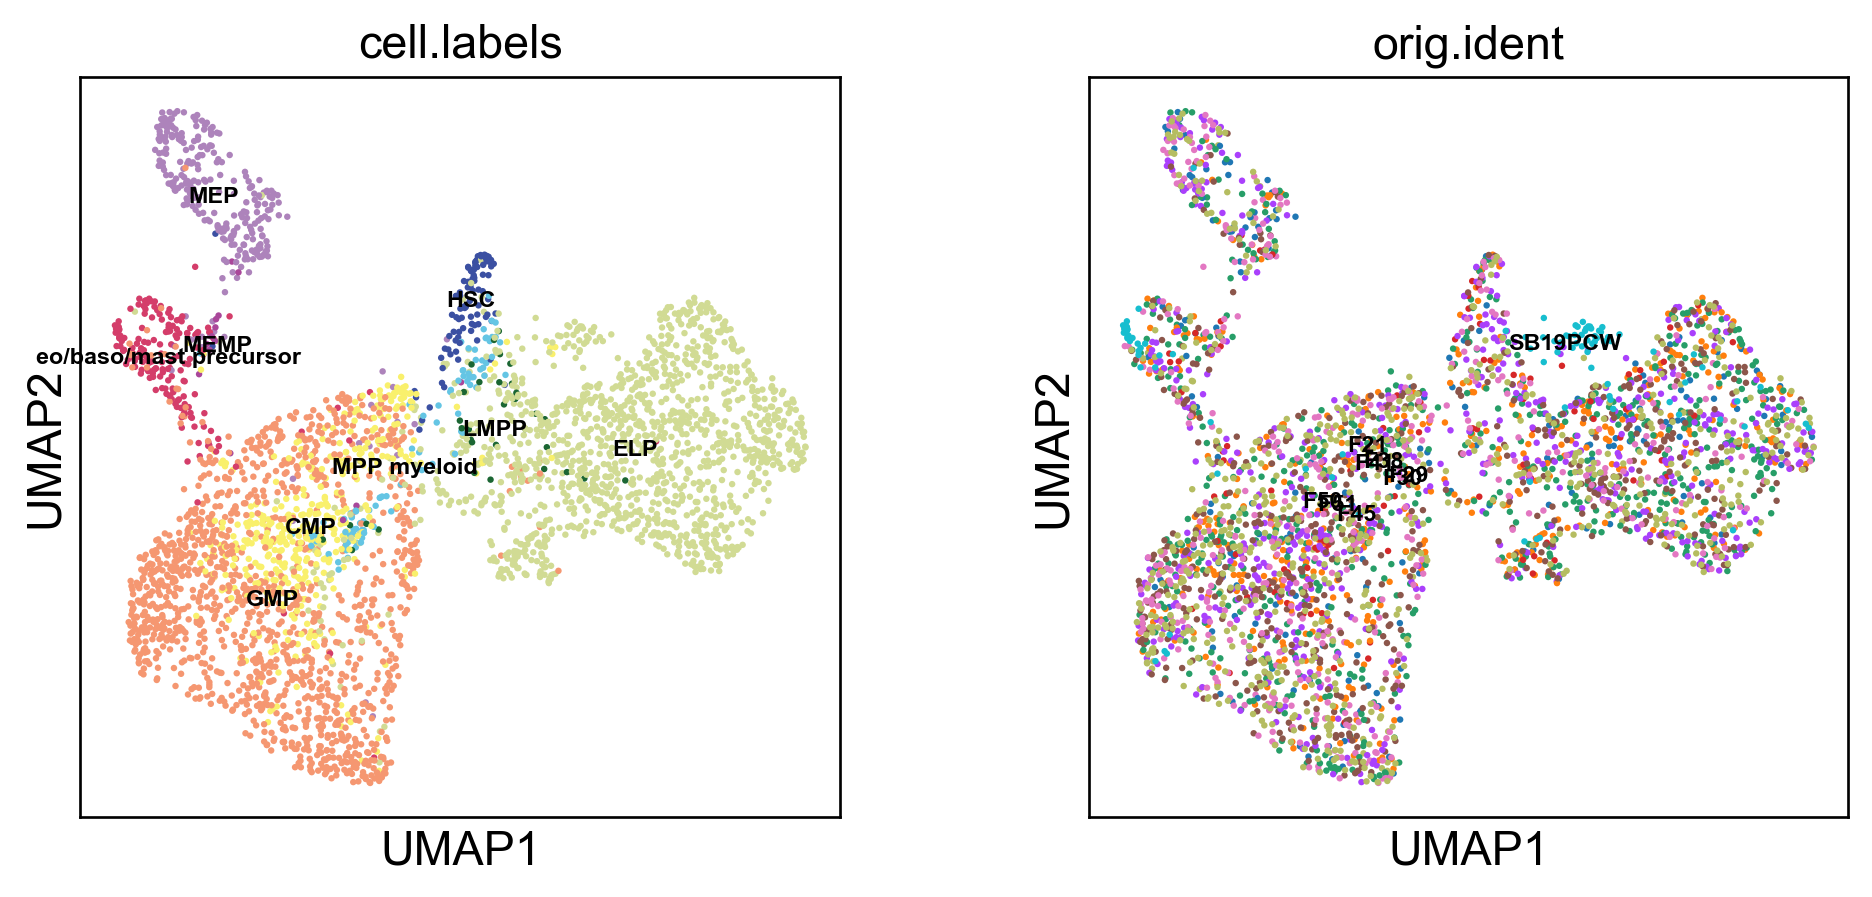

In [33]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15, legend_loc="on data", legend_fontsize=7) 

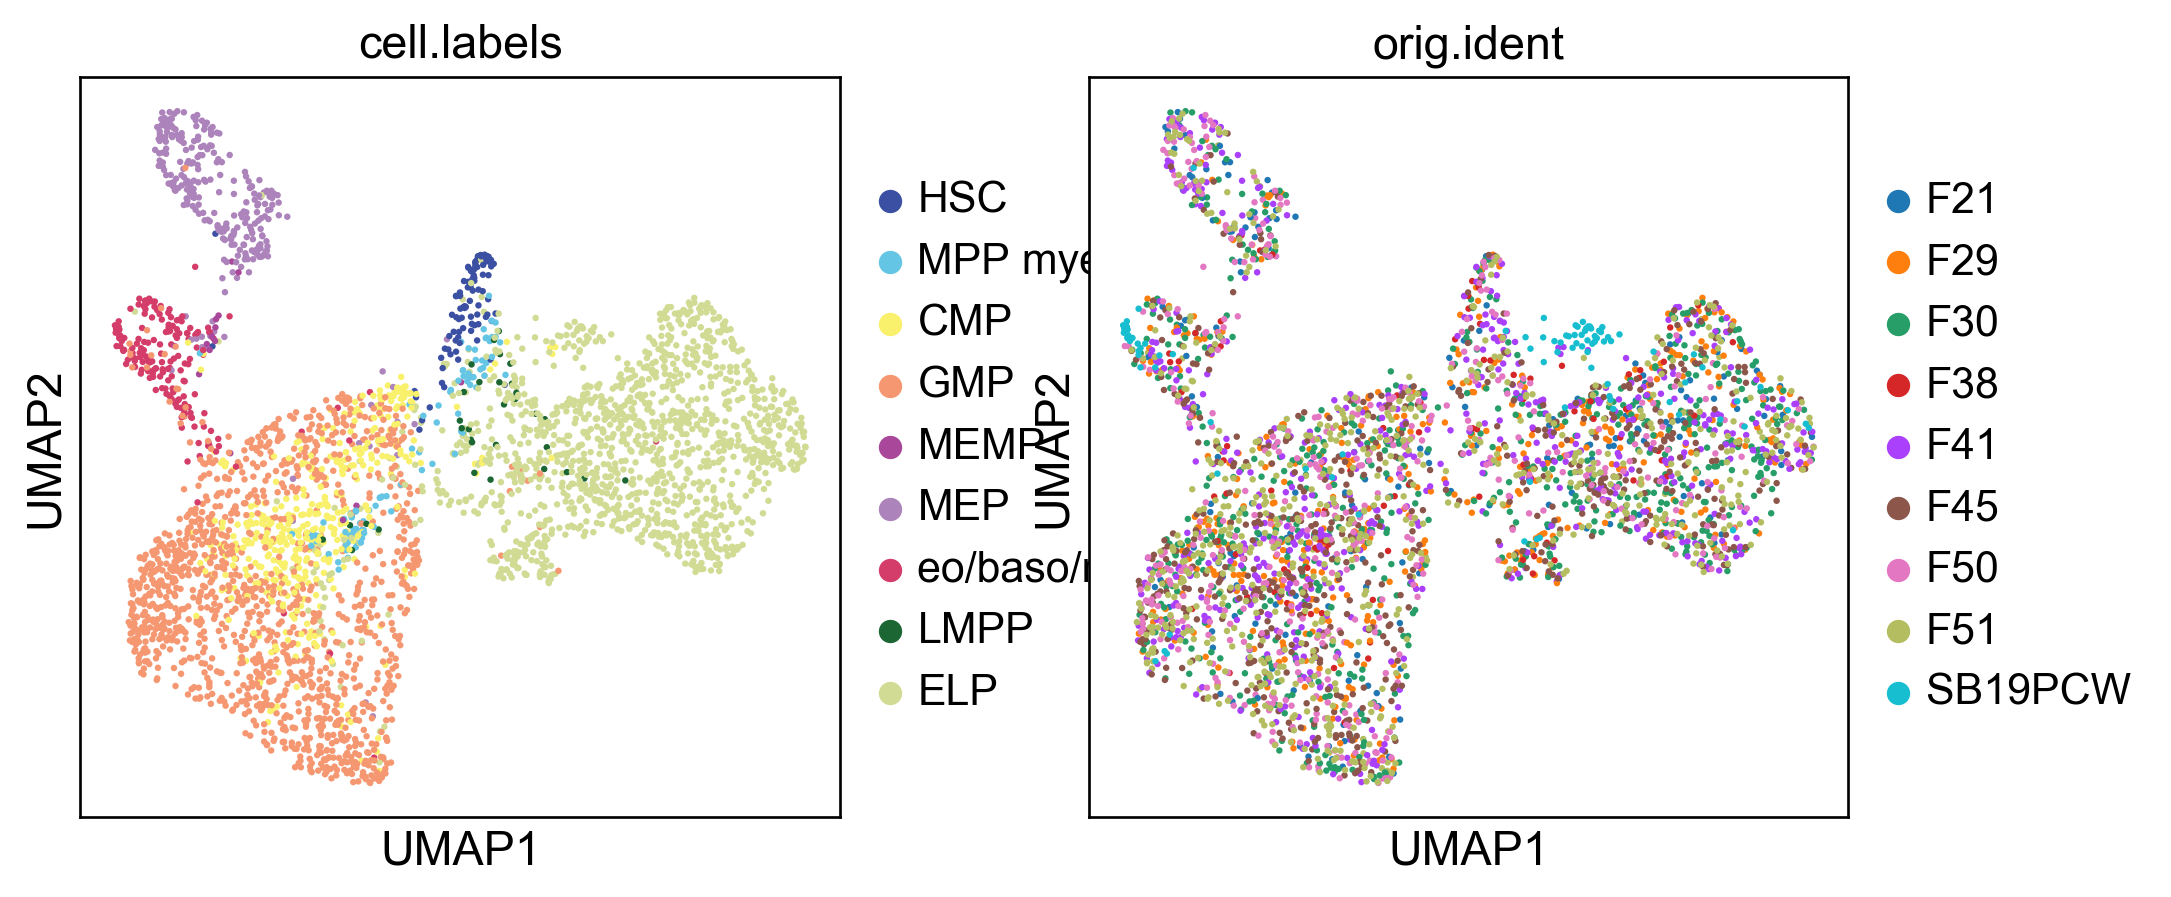

In [34]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

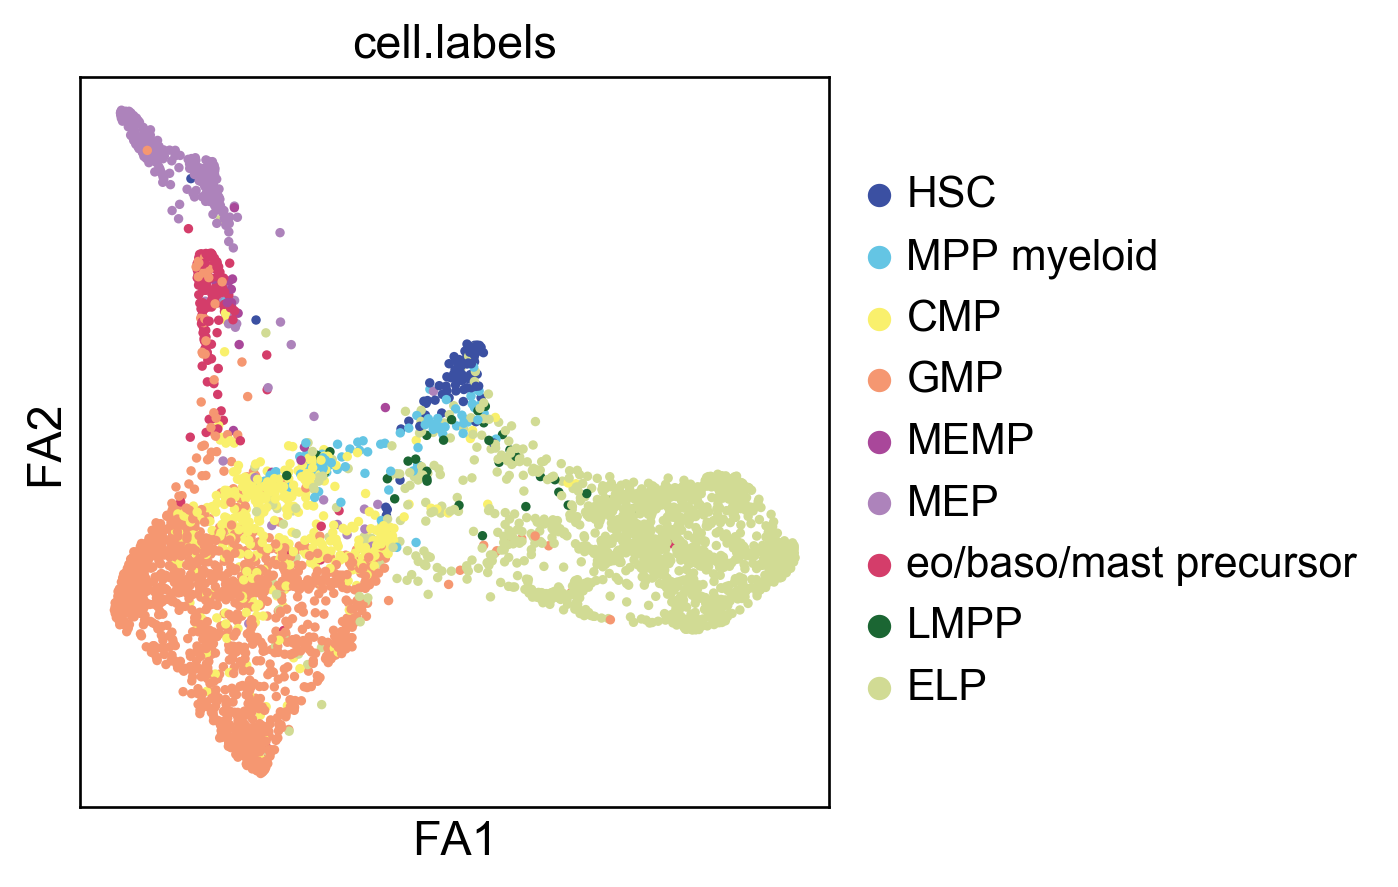

In [35]:
sc.pl.draw_graph(adata, color='cell.labels', layout='fa') 

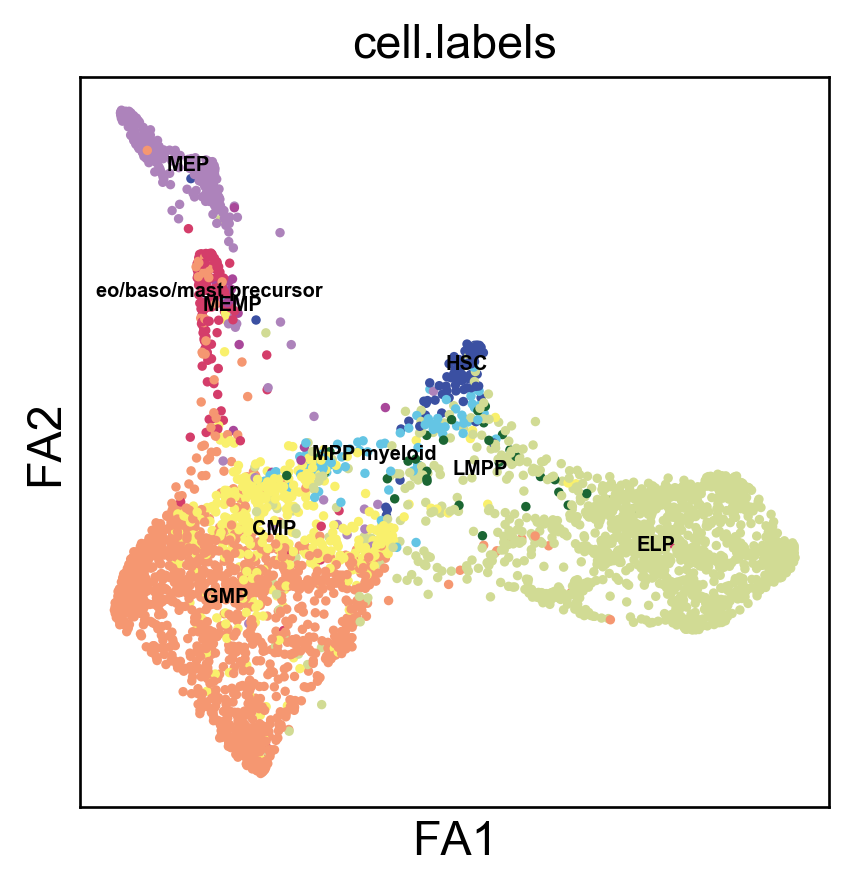

In [36]:
sc.pl.draw_graph(adata, color='cell.labels', legend_loc='on data', legend_fontsize=6) 

# Save plots

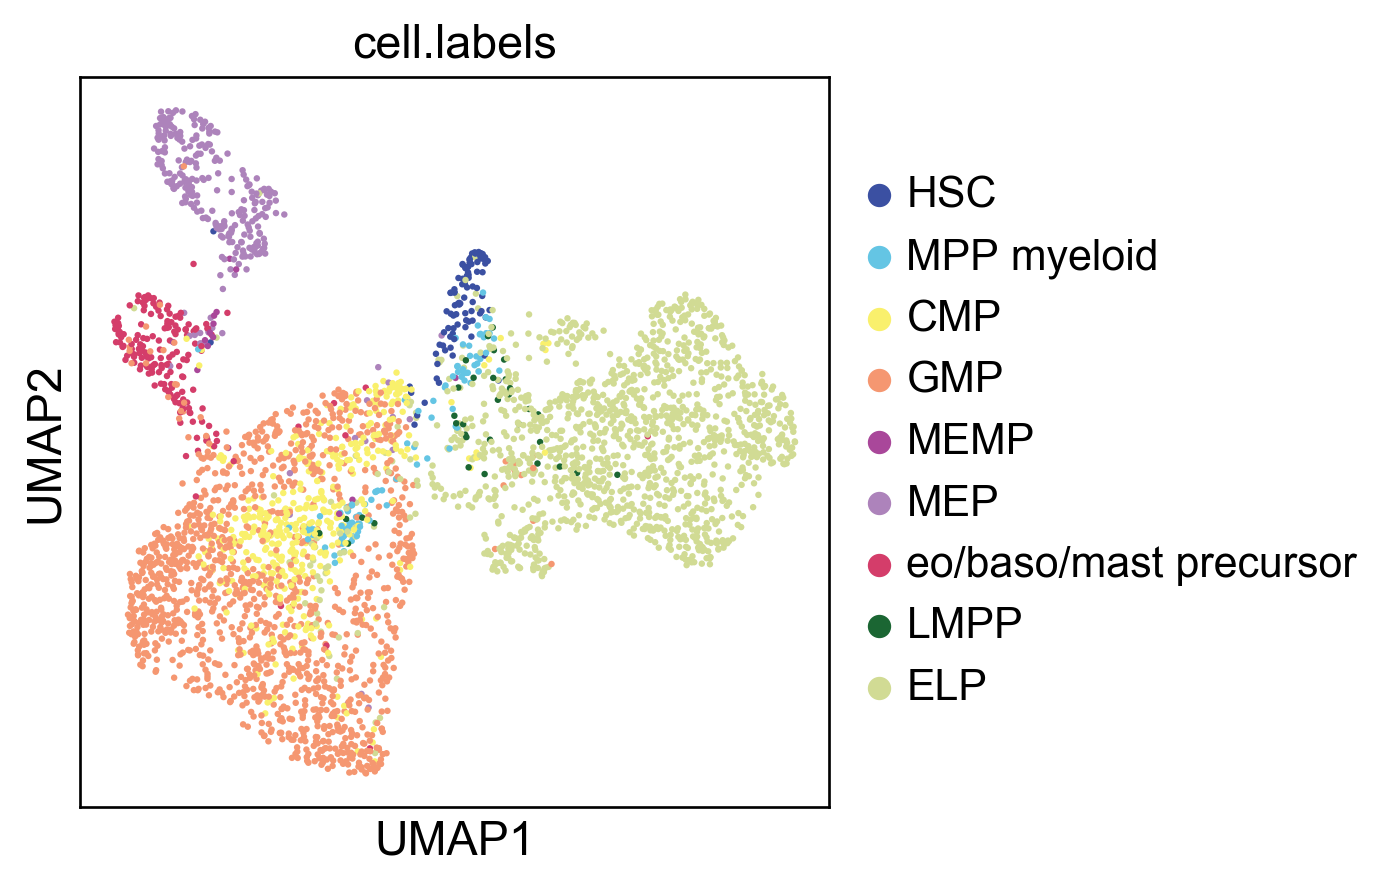

In [37]:
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.umap(adata, color=['cell.labels'], size=15, save="fig4a_progen_umap_20210118.pdf") 

In [38]:
sc.pl.draw_graph(adata, color='cell.labels', layout='fa', show=False, save='_fig4a_progen_fdg_20210118.pdf')

# Save the data

In [39]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [40]:
adata.X

<3741x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 12157950 stored elements in Compressed Sparse Row format>

In [41]:
adata.raw.X

<3741x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 14152604 stored elements in Compressed Sparse Row format>

In [42]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig4a_progen_dr_20210118.h5ad")